# Data Structuring with Python

## Objective 

We will be examining lightning strike data collected by the National Oceanic and Atmospheric Association (NOAA) for the year of 2018. 

First, we will find the locations with the greatest number of strikes within a single day.  
Then, we will examine the locations that had the greatest number of days with at least one lightning strike.  
Next, we will determine whether certain days of the week had more lightning strikes than others.  
Finally, we will add data from 2016 and 2017 and, for each month, calculate the percentage of total lightning strikes for that year that occurred in that month. We will then plot this data on a bar graph.

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from matplotlib import pyplot as plt

In [2]:
# read 2018 dataset 
df1 = pd.read_csv('eda_structuring_with_python_dataset1.csv')
df1.head()

,date,number_of_strikes,center_point_geom
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)
3,2018-01-03,38,POINT(-73.8 27)
4,2018-01-03,92,POINT(-79 28)


In [3]:
# discover more about the data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401012 entries, 0 to 3401011
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   date               object
 1   number_of_strikes  int64 
 2   center_point_geom  object
dtypes: int64(1), object(2)
memory usage: 77.8+ MB


In [4]:
# we notice that date column in the dataset is object
# so we need to convert it to datetime data type 
df1['date'] = pd.to_datetime(df1['date'])

In [5]:
# let's check the shape of the dataframe 
df1.shape

(3401012, 3)

Let's do a quick check for duplicates. If the shape of the data is different after running this code, we'll know there were duplicate rows.

In [6]:
dup_num = df1.duplicated().sum()
print('the number of duplicates in the dataset is : ' , dup_num)

the number of duplicates in the dataset is :  0


Let's do a quick check for Nulls.

In [7]:
df1.isnull().sum()

date                 0
number_of_strikes    0
center_point_geom    0
dtype: int64

### Locations with most strikes in a single day
To identify the locations with the most strikes in a single day, sort the `number_of_strikes` column in descending value, or most to least.

In [8]:
df1.sort_values(by='number_of_strikes' , ascending= False).head(10)

,date,number_of_strikes,center_point_geom
302758,2018-08-20,2211,POINT(-92.5 35.5)
278383,2018-08-16,2142,POINT(-96.1 36.1)
280830,2018-08-17,2061,POINT(-90.2 36.1)
280453,2018-08-17,2031,POINT(-89.9 35.9)
278382,2018-08-16,1902,POINT(-96.2 36.1)
11517,2018-02-10,1899,POINT(-95.5 28.1)
277506,2018-08-16,1878,POINT(-89.7 31.5)
24906,2018-02-25,1833,POINT(-98.7 28.9)
284320,2018-08-17,1767,POINT(-90.1 36)
24825,2018-02-25,1741,POINT(-98 29)


To find the number of days that a given geographic location had at least one lightning strike, we'll use the `value_counts()` function on the `center_point_geom` column.

In [9]:
df1['center_point_geom'].value_counts()[:20].rename_axis('locations').reset_index(name='counts').style.background_gradient()

,locations,counts
0,POINT(-81.5 22.5),108
1,POINT(-84.1 22.4),108
2,POINT(-82.5 22.9),107
3,POINT(-82.7 22.9),107
4,POINT(-82.5 22.8),106
5,POINT(-84.2 22.3),106
6,POINT(-76 20.5),105
7,POINT(-75.9 20.4),105
8,POINT(-82.2 22.9),104
9,POINT(-78 18.2),104


###  Lightning strikes by day of week

In [10]:
# create 2 columns the week column and the weekday column 
df1['week'] = df1['date'].dt.isocalendar().week
df1['weekday'] = df1['date'].dt.day_name()
df1.head()

,date,number_of_strikes,center_point_geom,week,weekday
0,2018-01-03,194,POINT(-75 27),1,Wednesday
1,2018-01-03,41,POINT(-78.4 29),1,Wednesday
2,2018-01-03,33,POINT(-73.9 27),1,Wednesday
3,2018-01-03,38,POINT(-73.8 27),1,Wednesday
4,2018-01-03,92,POINT(-79 28),1,Wednesday


Now, we can calculate the mean number of lightning strikes for each weekday of the year. We'll use the `groupby()` function to do this.

In [11]:
Avglightning_by_week = df1[['weekday','number_of_strikes']].groupby(['weekday']).mean().reset_index()
Avglightning_by_week

,weekday,number_of_strikes
0,Friday,13.349972
1,Monday,13.152804
2,Saturday,12.732694
3,Sunday,12.324717
4,Thursday,13.240594
5,Tuesday,13.813599
6,Wednesday,13.224568


In [12]:
# Define order of days for the plot
weekday_order = ['Monday','Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday']

Text(0.5, 1.0, 'Lightning distribution per weekday (2018)')

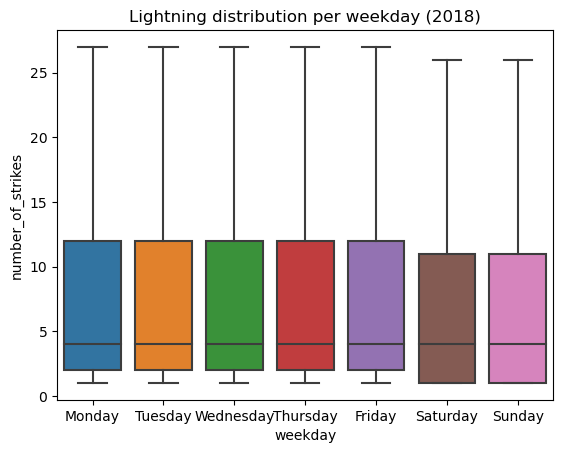

In [13]:
# Create boxplots of strike counts for each day of week
g = sns.boxplot(data=df1, 
            x='weekday',
            y='number_of_strikes', 
            order=weekday_order, 
            showfliers=False 
            )
g.set_title('Lightning distribution per weekday (2018)')

Notice that the median remains the same on all of the days of the week. As for Saturday and Sunday, however, the distributions are *both* lower than the rest of the week. We also know that the mean numbers of strikes that occurred on Saturday and Sunday were lower than the other weekdays.

### Monthly lightning strikes 2016–2018
Finally, we'll examine monthly lightning strike data from 2016–2018. We'll calculate the percentage of total lightning strikes for each year that occurred in a given month. We will then plot this data on a bar graph.

In [14]:
# Import 2016–2017 data
df2 = pd.read_csv('eda_structuring_with_python_dataset2.csv')

In [15]:
df2.head()

,date,number_of_strikes,center_point_geom
0,2016-01-04,55,POINT(-83.2 21.1)
1,2016-01-04,33,POINT(-83.1 21.1)
2,2016-01-05,46,POINT(-77.5 22.1)
3,2016-01-05,28,POINT(-76.8 22.3)
4,2016-01-05,28,POINT(-77 22.1)


In [16]:
# discover more about the data
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7077991 entries, 0 to 7077990
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   date               object
 1   number_of_strikes  int64 
 2   center_point_geom  object
dtypes: int64(1), object(2)
memory usage: 162.0+ MB


In [17]:
# we notice that date column in the dataset is object
# so we need to convert it to datetime data type 
df2['date'] = pd.to_datetime(df2['date'])

Let's do a quick check for duplicates. If the shape of the data is different after running this code, we'll know there were duplicate rows.

In [18]:
dup_num = df2.duplicated().sum()
print('the number of duplicates in the dataset is : ' , dup_num)

the number of duplicates in the dataset is :  0


Let's do a quick check for Nulls.

In [19]:
df2.isnull().sum()

date                 0
number_of_strikes    0
center_point_geom    0
dtype: int64

Now we can combine the 2016–2017 dataframe with the 2018 dataframe.

In [20]:
# df1 --> 2018 dataframe
# df2 --> 2016-2017 dataframe
df = pd.concat([df1.drop(['week', 'weekday'],axis=1) , df2] , ignore_index= True)
df.head()

,date,number_of_strikes,center_point_geom
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)
3,2018-01-03,38,POINT(-73.8 27)
4,2018-01-03,92,POINT(-79 28)


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10479003 entries, 0 to 10479002
Data columns (total 3 columns):
 #   Column             Dtype         
---  ------             -----         
 0   date               datetime64[ns]
 1   number_of_strikes  int64         
 2   center_point_geom  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 239.8+ MB


To help us with naming the bars of the bar plot, we'll create three new columns that isolate the year, month number, and month name. 

In [22]:
# add 3 new columns
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['month_txt'] = df['date'].dt.month_name()
df.head()

,date,number_of_strikes,center_point_geom,year,month,month_txt
0,2018-01-03,194,POINT(-75 27),2018,1,January
1,2018-01-03,41,POINT(-78.4 29),2018,1,January
2,2018-01-03,33,POINT(-73.9 27),2018,1,January
3,2018-01-03,38,POINT(-73.8 27),2018,1,January
4,2018-01-03,92,POINT(-79 28),2018,1,January


Let's check the overall lightning strike count for each year.

In [23]:
# Calculate total number of strikes per year
lightning_by_year = df[['year', 'number_of_strikes']].groupby(['year']).sum().reset_index()

In [24]:
lightning_by_year.rename(columns={'number_of_strikes':'year_strikes'},inplace=True)
lightning_by_year

,year,year_strikes
0,2016,41582229
1,2017,35095195
2,2018,44600989


Let's check the overall lightning strike count for each month.

In [25]:
lightning_by_month = df[['month_txt' , 'year' , 'number_of_strikes']].groupby(['month_txt' , 'year' ]).sum().reset_index()

In [26]:
lightning_by_month.head()

,month_txt,year,number_of_strikes
0,April,2016,2636427
1,April,2017,3819075
2,April,2018,1524339
3,August,2016,7250442
4,August,2017,6021702


In [27]:
# Combine `lightning_by_month` and `lightning_by_year` dataframes into single dataframe
percentage_lightning = lightning_by_month.merge(lightning_by_year,on='year')
percentage_lightning.head()

,month_txt,year,number_of_strikes,year_strikes
0,April,2016,2636427,41582229
1,August,2016,7250442,41582229
2,December,2016,316450,41582229
3,February,2016,312676,41582229
4,January,2016,313595,41582229


In [28]:
percentage_lightning.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   month_txt          36 non-null     object
 1   year               36 non-null     int64 
 2   number_of_strikes  36 non-null     int64 
 3   year_strikes       36 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.4+ KB


In [29]:
# Create new `percentage_lightning_per_month` column
percentage_lightning['percentage_lightning_per_month'] = (percentage_lightning.number_of_strikes/
                                                          percentage_lightning.year_strikes * 100.0)
percentage_lightning.head()

,month_txt,year,number_of_strikes,year_strikes,percentage_lightning_per_month
0,April,2016,2636427,41582229,6.340273
1,August,2016,7250442,41582229,17.436396
2,December,2016,316450,41582229,0.761022
3,February,2016,312676,41582229,0.751946
4,January,2016,313595,41582229,0.754156


Now we can plot the percentages by month in a bar graph! 

Text(0.5, 1.0, '% of lightning strikes each Month (2016-2018)')

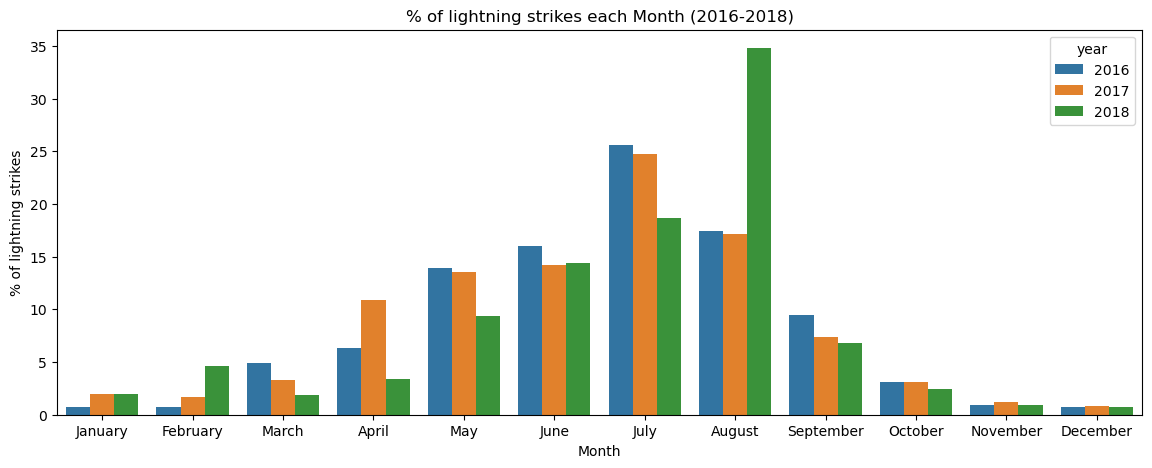

In [30]:
plt.figure(figsize=(14 , 5))

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

sns.barplot(data=percentage_lightning,
            x = 'month_txt',
            y = 'percentage_lightning_per_month',
            hue= 'year',
            order= month_order)

plt.xlabel("Month")
plt.ylabel("% of lightning strikes")
plt.title("% of lightning strikes each Month (2016-2018)")
